In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "fitbit"

## **Introduction:**
Bellabeat is a high-tech manufacturer of health-focused smart products for women. Bellabeat’s app and multiple smart devices collect data on activity, sleep, stress, hydration levels, and reproductive health to empower women with an understanding of their own health and habits. The company was founded in 2013 by Urška Sršen and Sando Mur and has expanded quickly since, now with the possibility to become a greater player in the global smart device market.

Bellabeat’s product line is made up of the Bellabeat app, which allows users insight into their health by providing data on their activity, sleep, stress, menstrual cycle, and mindfulness habits. The Bellabeat app also connects to the company’s line of smart device products. Leaf is Bellabeat’s classic wellness tracker that can be worn as a bracelet, necklace, or clip. Leaf tracks the user’s activity, sleep, and stress and connects to the Bellabeat app. Time is a wellness smart watch that also tracks the user’s activity, sleep, and stress and connects to the Bellabeat app. Spring is a smart water bottle that tracks the daily water intake of its user to ensure proper hydration levels are maintained throughout the day. Spring also connects to the Bellabeat app to track this data. Bellabeat membership is a subscription-based membership program that provides users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health, beauty, and mindfulness based on their lifestyle and goals.

## **ASK:**

#### **Key objectives:**

##### 1. Identify the business task:

* Analyze smart device usage data to gain insight into how consumers use non-Bellabeat smart devices to identify potential growth and provide high level recommendations for Bellabeat marketing strategy.

##### 2. Consider key stakeholders:

* The main stakeholders here are Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer; Sando Mur, Mathematician and Bellabeat’s cofounder; And the rest of the Bellabeat marketing analytics team.

## **PREPARE:**

The data being used for this analysis is the [FitBit FItness Tracker Data](https://www.kaggle.com/arashnic/fitbit) on Kaggle.
These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

Limitations for this data exist due to the sample size and absence of key characteristics of the participants, such as gender, age, location, lifestyle.

For this analysis the datasets for daily activity, daily calories, daily intensities, daily steps, heartrate by seconds, minute METs, daily sleep, and weight log information, will be used.

R Studio was used to complete this analysis because of the many packages and data visualization features available to explore the data with.

#### **Sorting and filtering the data:**

* Installing and loading the packages required:


In [2]:
install.packages("tidyverse")
install.packages("reshape2")
install.packages("scales")

library(tidyverse)
library(reshape2)
library(scales)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




#### **Importing datasets:**

In [3]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleep_day <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify

#### **Viewing the data frames:**
To ensure that the data was imported corrently the head() function is used.

daily_activity:

In [4]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [5]:
glimpse(daily_activity)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

***daily_intensities:***

In [6]:
head(daily_intensities)

Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


***daily_steps:***

In [7]:
head(daily_steps)

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


***sleep_day:***

In [8]:
head(sleep_day)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


***weight_log:***

In [9]:
head(weight_log)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


### **Removing data frames:**

All six of the data frames contain the “Id” column, so it is possible to merge all of them. The daily_activity data frame appears to contain data for calories, intensities, and steps. In order to use the daily_activity frame in place of daily_calories, daily_intensities, and daily_steps, the number of observations must be the same and the observations must match for each ID number.

In [10]:
merge_1 <- merge(daily_activity, daily_calories, by = c("Id", "Calories"))
merge_2 <- merge(daily_intensities, daily_intensities, by = c("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance"))

merge_daily <- merge(merge_1, merge_2, by = c("Id","ActivityDay","SedentaryMinutes", "LightlyActiveMinutes","FairlyActiveMinutes","VeryActiveMinutes", "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance")) %>%
select(-ActivityDay) %>% rename(Date = ActivityDate)

daily_data <- merge(merge_daily, sleep_day, by = "Id",all=TRUE) %>% drop_na() %>% select(-SleepDay, -TrackerDistance)

options(repr.plot.width=30)

The outputs of the head function of the temporary data frames match those of the original data frames.

In [11]:

summary(daily_data)


       Id            SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes
 Min.   :1.504e+09   Min.   :   0.0   Min.   :  0.0        Min.   :  0.00     
 1st Qu.:4.020e+09   1st Qu.: 687.0   1st Qu.:  0.0        1st Qu.:  0.00     
 Median :4.703e+09   Median : 781.0   Median :171.0        Median :  3.00     
 Mean   :5.117e+09   Mean   : 938.6   Mean   :156.4        Mean   : 13.58     
 3rd Qu.:6.962e+09   3rd Qu.:1440.0   3rd Qu.:240.0        3rd Qu.: 19.00     
 Max.   :8.792e+09   Max.   :1440.0   Max.   :518.0        Max.   :143.00     
 VeryActiveMinutes SedentaryActiveDistance LightActiveDistance
 Min.   :  0.00    Min.   :0.0000000       Min.   : 0.000     
 1st Qu.:  0.00    1st Qu.:0.0000000       1st Qu.: 0.000     
 Median :  0.00    Median :0.0000000       Median : 2.860     
 Mean   : 18.76    Mean   :0.0005276       Mean   : 2.771     
 3rd Qu.: 28.00    3rd Qu.:0.0000000       3rd Qu.: 4.480     
 Max.   :210.00    Max.   :0.1100000       Max.   :10.300     
 Moder

## **PROCESS & ANALYSE:**

**Key objectives:**

* Clean and prepare the data for analysis:

 The data is further categorised into four based on the activity type the user has done most.

In [12]:
data_by_usertype <- daily_data %>%
summarise(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")), Calories, .group=Id) %>%
drop_na()

Now i can understand how calories are burned according to the type of activity a user prefers.

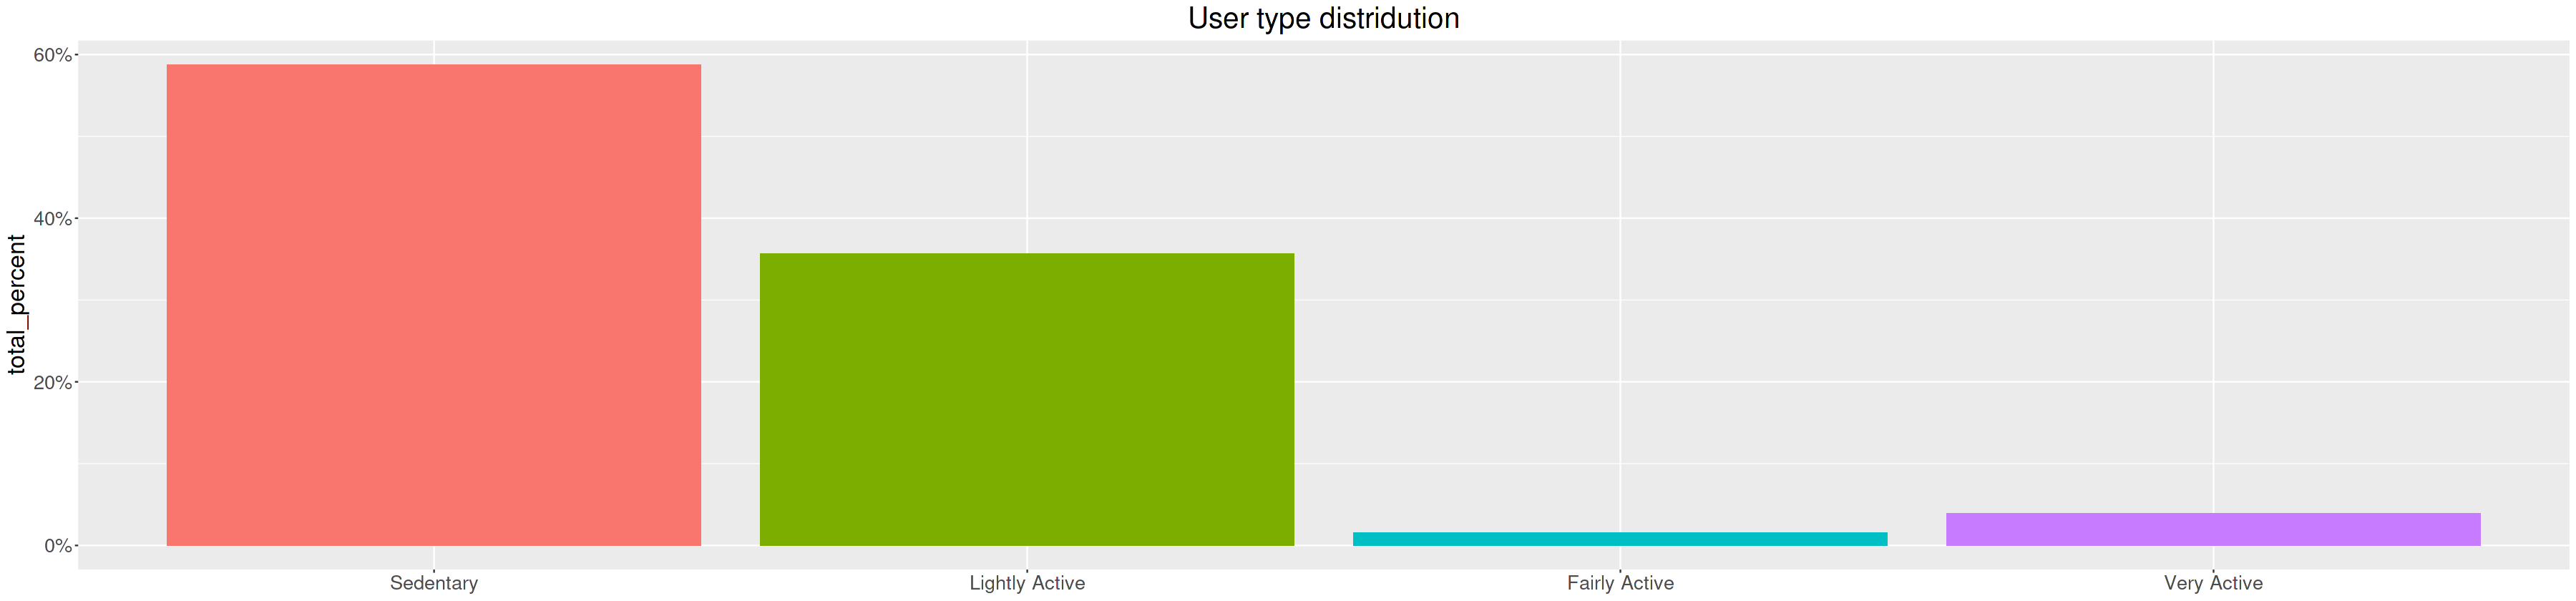

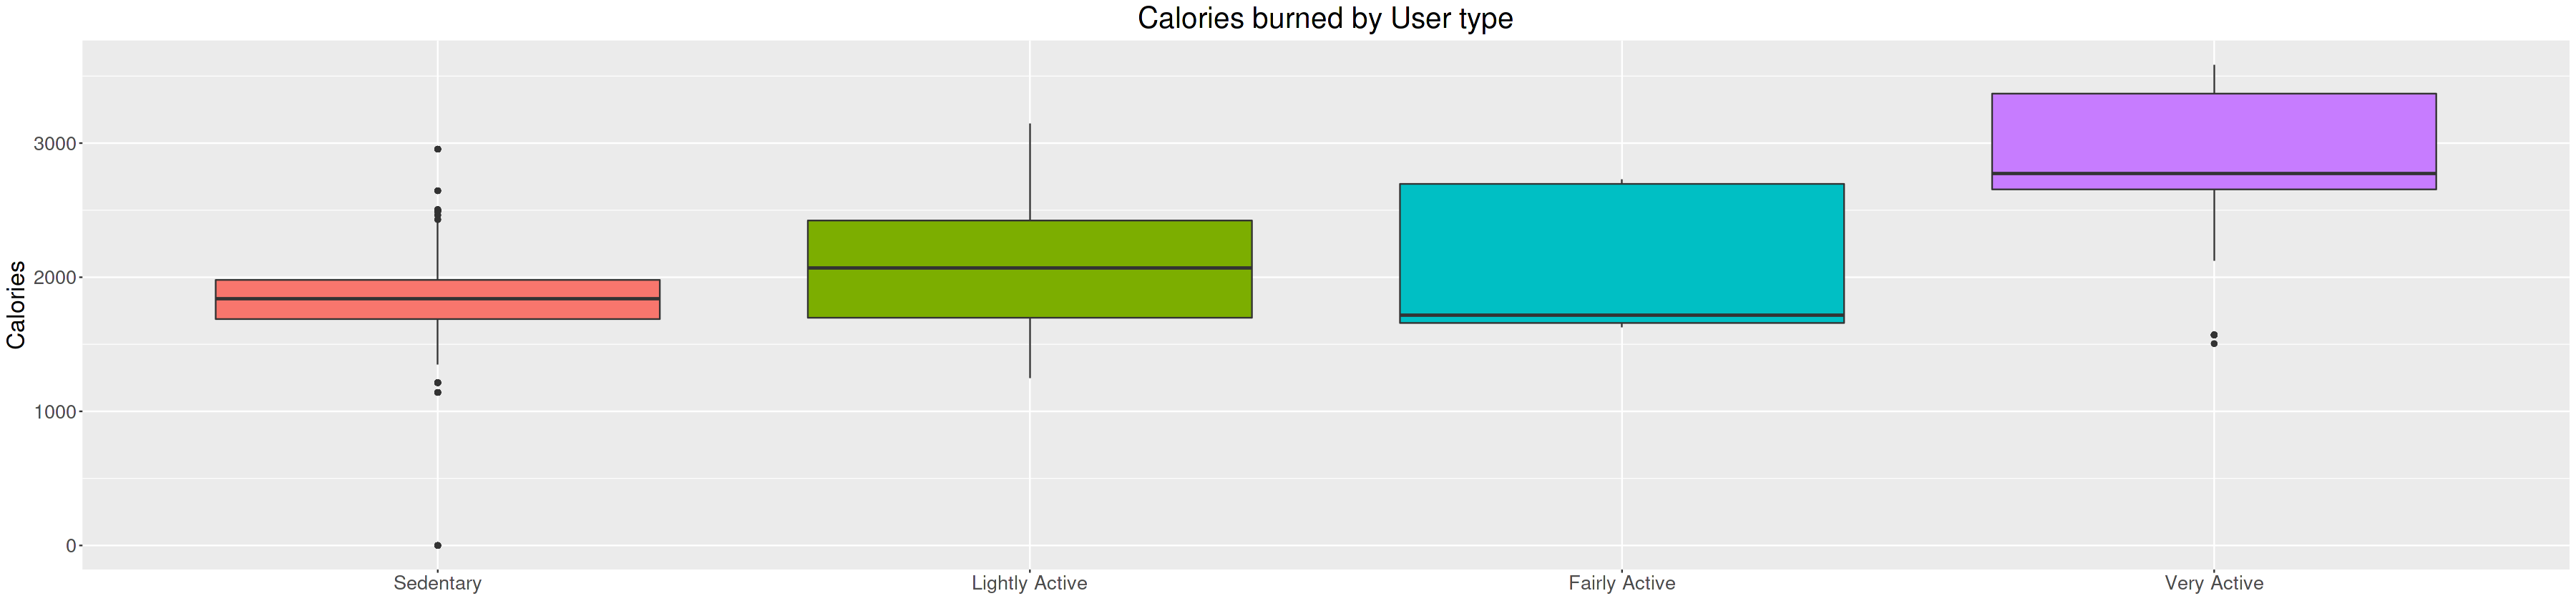

In [13]:
data_by_usertype %>%
group_by(user_type) %>%
summarise(total = n()) %>%
mutate(totals = sum(total)) %>%
group_by(user_type) %>%
summarise(total_percent = total / totals) %>%
ggplot(aes(user_type,y=total_percent, fill=user_type)) +
    geom_col()+
    scale_y_continuous(labels = scales::percent) +
    theme(legend.position="none") +
    labs(title="User type distridution", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

ggplot(data_by_usertype, aes(user_type, Calories, fill=user_type)) +
    geom_boxplot() +
    theme(legend.position="none") +
    labs(title="Calories burned by User type", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

* It is not surprising to see that the users who do more of the  fairly active and very active activities burn more calories compared to the other categories. We can also see that a large part of the users prefer to do sedentary activities.

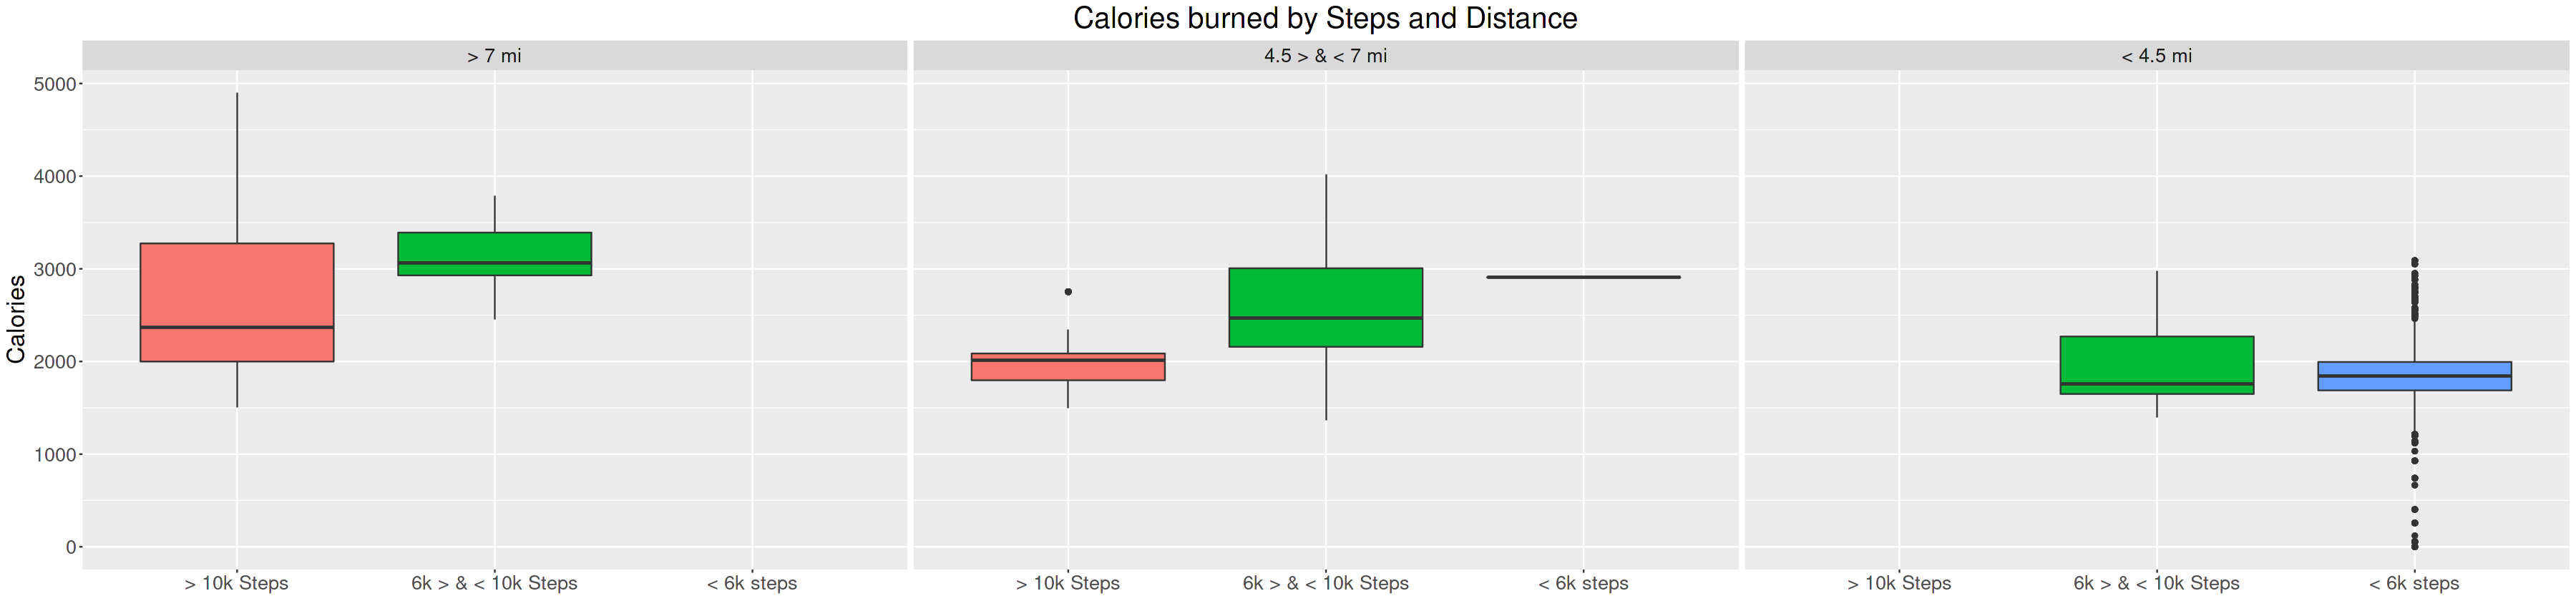

In [14]:
daily_data %>%
summarise(
distance = factor(case_when(
    TotalDistance < 4.5 ~ "< 4.5 mi",
    TotalDistance >= 4.5 & TotalDistance <= 7 ~ "4.5 > & < 7 mi",
    TotalDistance > 7 ~ "> 7 mi",
),levels = c("> 7 mi","4.5 > & < 7 mi","< 4.5 mi")),
steps = factor(case_when(
    TotalSteps < 6000 ~ "< 6k steps",
    TotalSteps >= 6000 & TotalSteps <= 10000 ~ "6k > & < 10k Steps",
    TotalSteps > 10000 ~ "> 10k Steps",
),levels = c("> 10k Steps","6k > & < 10k Steps","< 6k steps")),
Calories) %>%
ggplot(aes(steps,Calories,fill=steps)) +
    geom_boxplot() +
    facet_wrap(~distance)+
    labs(title="Calories burned by Steps and Distance",x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

* The boxplot above shows the calories burned by the three categories of steps based on the summary values and then its faceted by the three categories of distance traveled.This shows that the most calories burned are the "6k > & < 10k Steps" and "> 7 miles" which would indicate some kind of running activity that allows the user to traverse more distance with less steps.
* The speed at which the activity is performed is significant in the amount of calories burned.

To focus on the impact of **Sleep quality** i will create a new table with sleeping categories for each individual user type:

In [15]:
sleepType_by_userType <- daily_data %>%
group_by(Id) %>%
summarise(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")),
sleep_type = factor(case_when(
    mean(TotalMinutesAsleep) < 360 ~ "Bad Sleep",
    mean(TotalMinutesAsleep) > 360 & mean(TotalMinutesAsleep) <= 480 ~ "Normal Sleep",
    mean(TotalMinutesAsleep) > 480 ~ "Over Sleep",
),levels=c("Bad Sleep", "Normal Sleep", "Over Sleep")), total_sleep = sum(TotalMinutesAsleep) ,.groups="drop"
) %>%
drop_na() %>%
group_by(user_type) %>%
summarise(bad_sleepers = sum(sleep_type == "Bad Sleep"), normal_sleepers = sum(sleep_type == "Normal Sleep"),over_sleepers = sum(sleep_type == "Over Sleep"),total=n(),.groups="drop") %>%
group_by(user_type) %>%
summarise(
    bad_sleepers = bad_sleepers / total, 
    normal_sleepers = normal_sleepers / total, 
    over_sleepers = over_sleepers / total,
    .groups="drop"
)


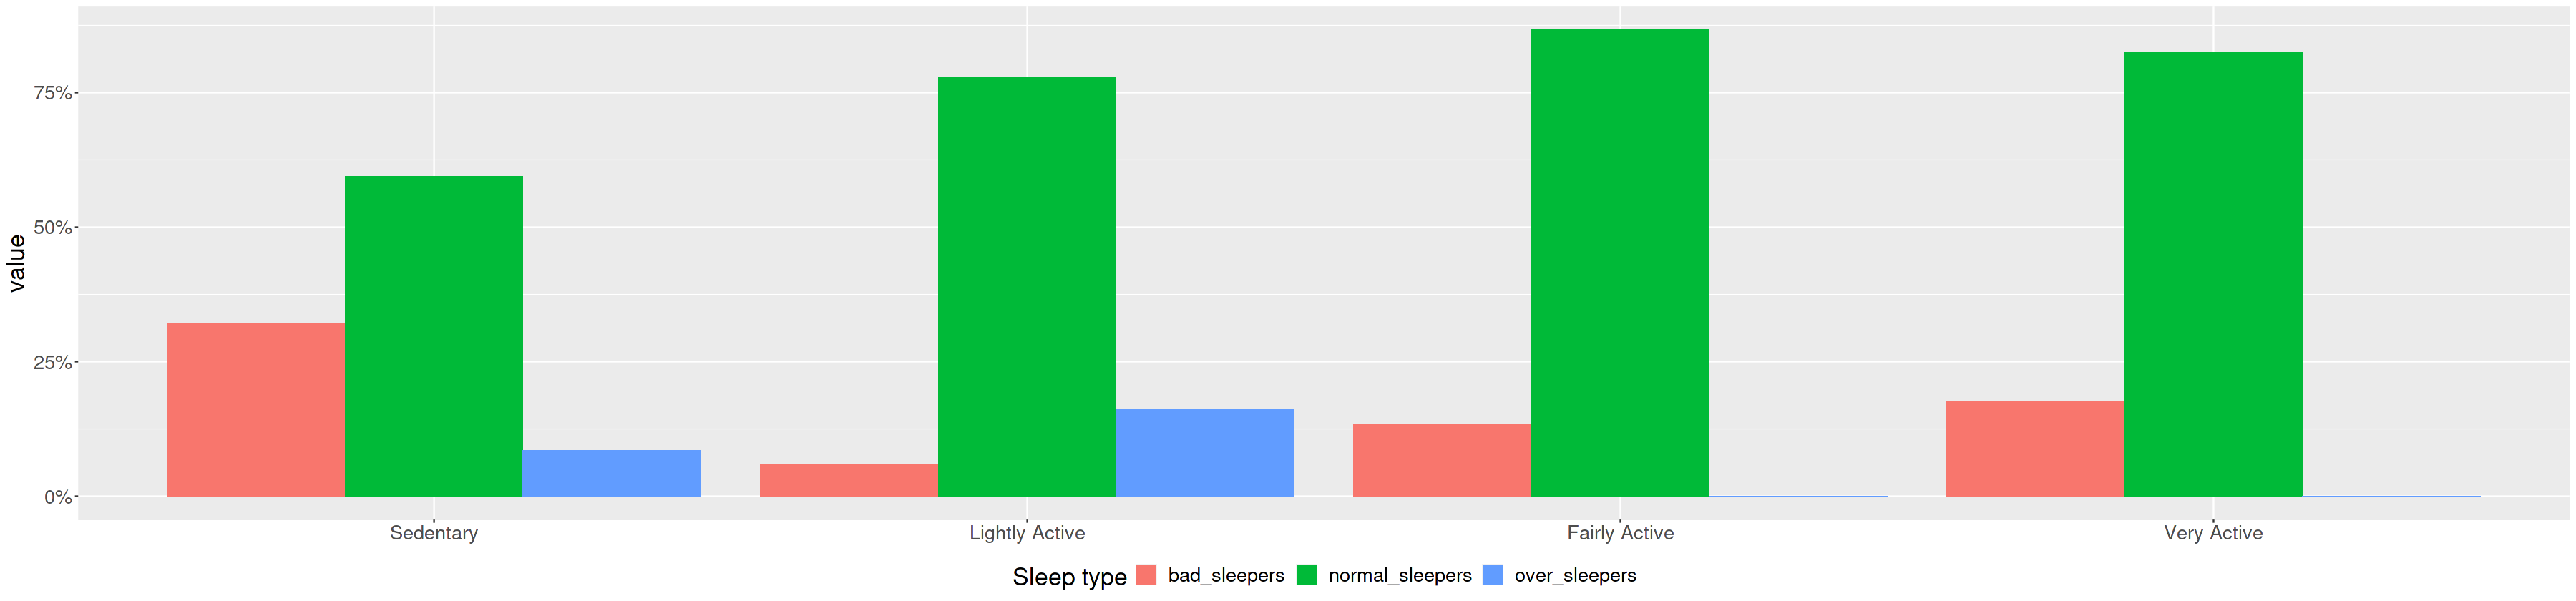

In [16]:
sleepType_by_userType_melted<- melt(sleepType_by_userType, id.vars = "user_type")

ggplot(sleepType_by_userType_melted, aes(user_type, value, fill = variable)) +
geom_bar(position = "dodge", stat = "identity") +
scale_y_continuous(labels = scales::percent) +
labs(x=NULL, fill="Sleep type") + 
theme(legend.position="bottom",text = element_text(size = 20),plot.title = element_text(hjust = 0.5))


* The above chart shows the quality of sleep of each type of users and this shows ths relation between the activity and the sleep quality,the sedentary users have the largest percent of bad sleepers and the amount of bad sleepers decreases significantly with increase in activity.
* It is also interesting to note that fairly active and very active users have an extremely low no of over sleepers, which can show thats they can be more disciplined or busy in general than the other two categories.

### **SHARE:**

**Key objectives:**

**Share my conclusions:**

1. There is a clear relation between the higher intensity of the activity and the calories burned and thus encouraging the users to perform more intensity training will help the users loose weight much faster and to effectively use the time when working out.
2. There is also a clear relation between the activity level and the sleep quality of the users, which will improve the users stress levels and general quality of life.

* These conclusions can be used to effectively market how the device can help the users and even proveide high intensity training regiments/guides online for the users to maximize the effectiveness of their training.
* The improvement of the sleep quality of the users can be marketed in a way to indicate the potential benefits of this and also tie it along with how the sleep quality and the activity levels go hand in hand to further encourage the user to increase their activities to see the improvement in the metrics and in their daily life.